In [2]:
!pip install lightkurve

import lightkurve as lk
import matplotlib.pyplot as plt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.9/256.9 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.0/201.0 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 kB 8.4 MB/s eta 0:00:00
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11373 sha256=55584d24a1512e32954170e57d01995d5a445f630a99170cd6ed8997718c2d28
  Stored in directory: /root/.cache/pip/wheels/04/15/cd/2f622

/usr/local/lib/python3.12/dist-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


In [3]:
TIC = 'TIC 88992642' # Replace a this with another unique Tic. Make sure this is not ai generated.
sector_data = lk.search_lightcurve(TIC)
sector_data

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 26,2020,SPOC,120,88992642,0.0
1,TESS Sector 40,2021,SPOC,120,88992642,0.0
2,TESS Sector 53,2022,SPOC,120,88992642,0.0
3,TESS Sector 52,2022,SPOC,120,88992642,0.0
4,TESS Sector 79,2024,SPOC,20,88992642,0.0
5,TESS Sector 80,2024,SPOC,20,88992642,0.0
6,TESS Sector 80,2024,SPOC,120,88992642,0.0
7,TESS Sector 79,2024,SPOC,120,88992642,0.0
8,TESS Sector 25,2020,TESS-SPOC,1800,88992642,0.0


<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

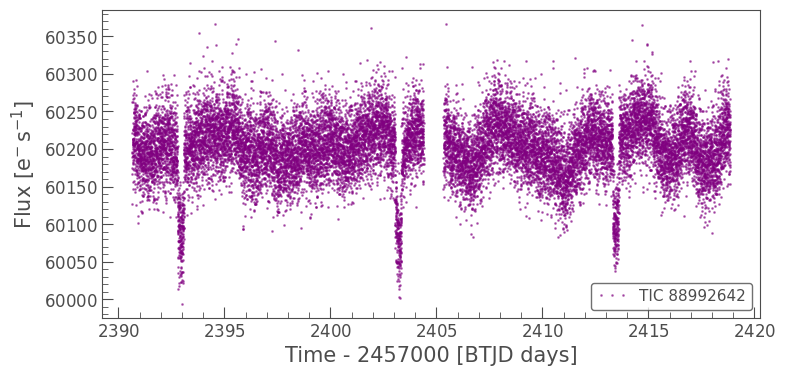

In [8]:
lc = sector_data[1].download()
# You have to put the number for sector_data[] you can choose your own number
lc.plot(linewidth= 0, marker = '.', color = 'purple', alpha = 0.5 )
# This is the default code but you can customize it if you want

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

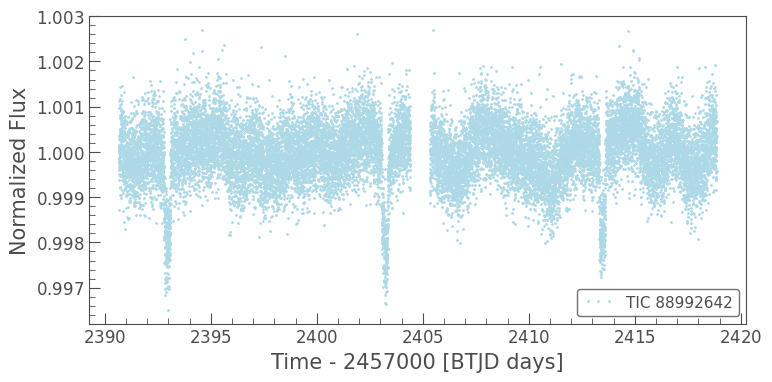

In [6]:
lc_norm = lc.normalize()
lc_norm.plot(linewidth= 0, marker = '.', color = 'lightblue', alpha = 1 )

# Haha you thought this was going to be easy, continue from here to normalize the above data

**Dear Participants,**

Using ***AI*** for assignment submission is strictly prohibited. You can use
AI to practice and learn but no AI for assignments. See you on the next doubt session make sure to save doubts!

<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

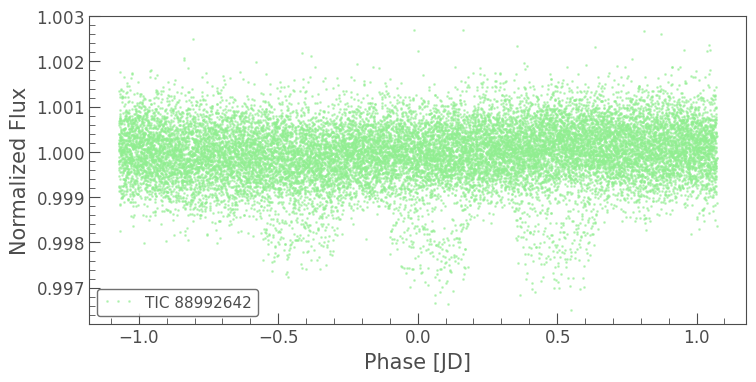

In [11]:
t0 = 2825.459527
period = 2.14363
lc_phased = lc_norm.fold(period = period, epoch_time = t0)
lc_phased.plot(linewidth =0, color = 'lightgreen', marker='.', alpha=0.5 )

(-0.5, 0.5)

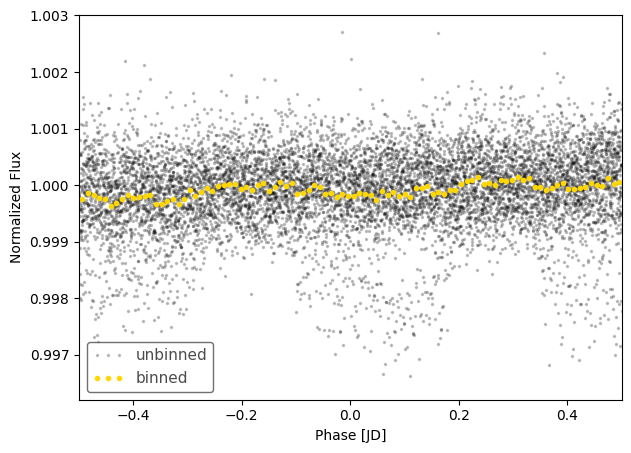

In [10]:
lc_phased_binned = lc_phased.bin (15/24/60) #bin width =15 mins. it has to be in terms of minutes when using Lightkurve
fig, ax = plt.subplots (figsize = (7,5))
lc_phased.plot(ax = ax, marker = '.', linewidth = 0, color = 'black', alpha = 0.2, markersize = 3, label = "unbinned")
lc_phased_binned.plot(ax= ax, marker = 'o', linewidth= 0, color = 'gold', alpha = 1, markersize = 3, label = "binned")
plt.xlim(-0.5,0.5)